In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
data_path = 'dog-vs-cat' 
classes = os.listdir(data_path)
print("Классы данных:", classes)

Классы данных: ['cat', 'dog']


In [4]:
cat_dir = os.path.join(data_path, 'cat')
dog_dir = os.path.join(data_path, 'dog')

In [5]:
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

In [6]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

<Figure size 1600x1600 with 0 Axes>

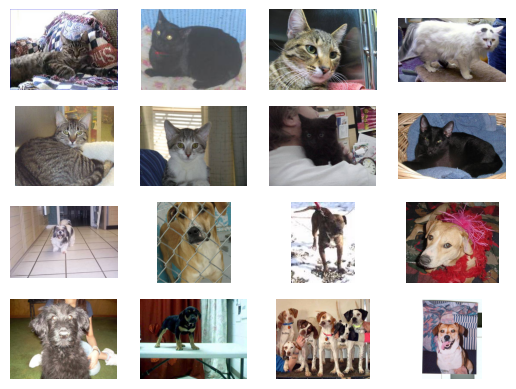

In [7]:
pic_index = 210
cat_images = [os.path.join(cat_dir, fname) for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname) for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
    img = plt.imread(img_path)
    plt.imshow(img)
plt.show()

In [8]:
base_dir = data_path

train_datagen = image_dataset_from_directory(base_dir,
                                             image_size=(200, 200),
                                             subset='training',
                                             seed=1,
                                             validation_split=0.1,
                                             batch_size=32)

test_datagen = image_dataset_from_directory(base_dir,
                                            image_size=(200, 200),
                                            subset='validation',
                                            seed=1,
                                            validation_split=0.1,
                                            batch_size=32)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [10]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/Users/baiturtashbaev/Documents/Байтур/5 semester/3colloqium/pythonProject/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 679s 957ms/step - accuracy: 0.5857 - loss: 0.7447 - val_accuracy: 0.6684 - val_loss: 0.6429
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 563s 799ms/step - accuracy: 0.7144 - loss: 0.5560 - val_accuracy: 0.7580 - val_loss: 0.4986
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 563s 799ms/step - accuracy: 0.7647 - loss: 0.4824 - val_accuracy: 0.7900 - val_loss: 0.4751
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 569s 808ms/step - accuracy: 0.7231 - loss: 0.5386 - val_accuracy: 0.7676 - val_loss: 0.5346
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 547s 777ms/step - accuracy: 0.7536 - loss: 0.5049 - val_accuracy: 0.5304 - val_loss: 1.3395
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 541s 768ms/step - accuracy: 0.7649 - loss: 0.4900 - val_accuracy: 0.5568 - val_loss: 1.5399
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 540s 767ms/step - accuracy: 0.8118 - loss: 0.4105 - val_accuracy: 0.6004 - val_loss: 1.3690
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 539s 766ms/step - accuracy: 0.8316 -

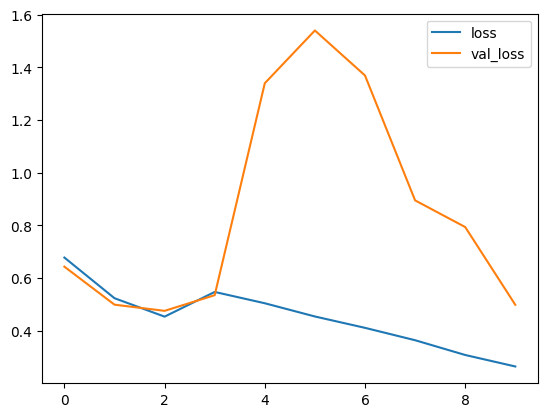

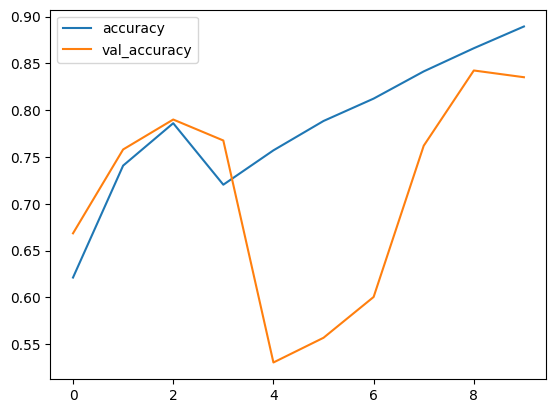

In [11]:
history = model.fit(train_datagen,
                    epochs=10,
                    validation_data=test_datagen)

import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [16]:
model.save('dog_cat_classifier.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Cat


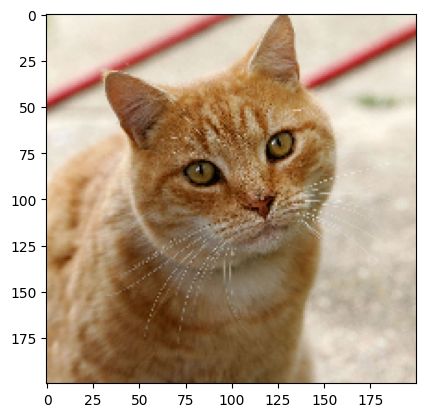

In [15]:
test_image = tf.keras.preprocessing.image.load_img('Cat03.jpg', target_size=(200, 200))

plt.imshow(test_image)

test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)

if result >= 0.5:
    print("Dog")
else:
    print("Cat")

In [1]:
from tensorflow.keras.models import load_model

modelRes = load_model('dog_cat_classifier.keras')

2024-12-14 12:58:55.013990: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/baiturtashbaev/Documents/Байтур/5 semester/3colloqium/pythonProject/venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Cat


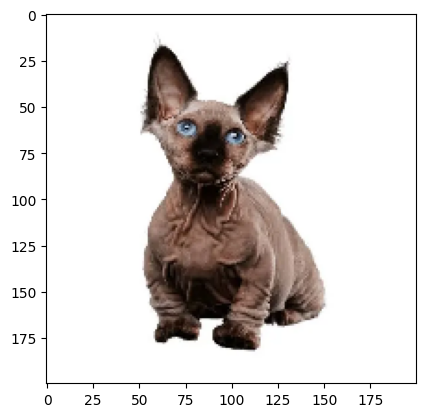

In [5]:
test_image = tf.keras.preprocessing.image.load_img('cat4.jpg', target_size=(200, 200))

plt.imshow(test_image)

test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = modelRes.predict(test_image)

if result >= 0.5:
    print("Dog")
else:
    print("Cat")